In [1]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [2]:
img_path = "test.jpg"

In [3]:
model = init_detector(
    config="config.py",
    checkpoint="work_dir/epoch_50.pth"
)

Loads checkpoint by local backend from path: work_dir/epoch_50.pth


In [4]:
register_all_modules()
model = init_detector(
    "config.py",
    "work_dir/epoch_50.pth",
    device='cuda:0'
)

Loads checkpoint by local backend from path: work_dir/epoch_50.pth


In [5]:
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta

06/09 08:38:55 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


/home/zhy/miniconda3/envs/mmlab/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:757: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/home/zhy/miniconda3/envs/mmlab/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:828: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


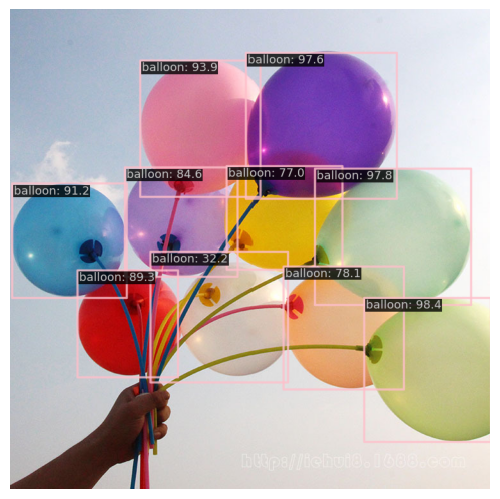

In [7]:
img = mmcv.imread(img_path, channel_order='rgb')
output = inference_detector(model, img)

img_output = visualizer.add_datasample(
    "result",
    img,
    data_sample=output,
    draw_gt=False,
    # draw_heatmap=False,
    # draw_bbox=True,
    # show=False,
    # show_kpt_idx=True,
    # wait_time=0,
    # kpt_thr=.3,
)

visualizer.show()

In [ ]:
!python featmap_vis_demo.py \
    test.jpg \
    config.py \
    work_dir/epoch_50.pth \
    --target-layers neck \
    --channel-reduction squeeze_mean


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.


Traceback (most recent call last):
  File "/home/zhy/mmlab lear/balloon_det/featmap_vis_demo.py", line 7, in <module>
    from mmdet.apis import inference_detector, init_detector
ModuleNotFoundError: No module named 'mmdet'


In [ ]:
!python boxam_vis_demo.py \
    test.jpg \
    config.py \
    work_dir/epoch_50.pth \
    --target-layer neck.out_convs[2]